## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results_df=pd.merge(mouse_metadata,study_results, on="Mouse ID" )
# Display the data table for preview
mouse_results_df.sample(25)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1699,w422,Ketapril,Female,18,26,25,56.957917,2
741,c895,Infubinol,Female,7,29,25,57.534193,2
855,f993,Naftisol,Male,21,28,15,49.106975,1
1116,l490,Ceftamin,Male,24,26,15,50.524813,1
1071,k804,Infubinol,Female,23,29,10,49.471244,0
765,e213,Naftisol,Male,8,27,0,45.000000,0
1253,o287,Ceftamin,Male,2,28,10,47.360201,1
1530,s619,Stelasyn,Male,22,30,5,46.602269,0
333,j119,Capomulin,Female,7,23,25,42.417166,1
487,a275,Ceftamin,Female,20,28,15,49.734404,0


In [2]:
# Checking the number of mice.
mice_number=mouse_results_df["Mouse ID"].nunique()
mice_number_count=mouse_results_df["Mouse ID"].count()

print(mice_number_count) #total count of all rows
print(mice_number) #total count of all uniques values for Mouse ID
mice_df=pd.DataFrame({'Number of mice':[mice_number]})
mice_df

1893
249


,Number of mice
0,249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouseID_df=mouse_results_df.copy()
duplicate=duplicate_mouseID_df[['Mouse ID','Timepoint']][duplicate_mouseID_df.duplicated(['Mouse ID','Timepoint'])]
duplicate.head(25)

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_all=duplicate_mouseID_df[duplicate_mouseID_df.duplicated('Mouse ID')]
duplicate_all


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. 
drop_duplicate_all=mouse_results_df.copy()
drop_duplicate_all.drop_duplicates(subset=(["Mouse ID","Timepoint"]), keep='first', inplace=True)
drop_duplicate_all

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_number_count2=drop_duplicate_all["Mouse ID"].count()
mice_number_count2

1888

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

volume=drop_duplicate_all.copy().groupby(["Drug Regimen"])

tumor_volume_mean=volume["Tumor Volume (mm3)"].mean() 
tumor_volume_median=volume["Tumor Volume (mm3)"].median()
tumor_volume_var=volume["Tumor Volume (mm3)"].var()
tumor_volume_std=volume["Tumor Volume (mm3)"].std()
tumor_volume_sem=volume["Tumor Volume (mm3)"].sem()

tumor_volume_df=pd.DataFrame({'mean':tumor_volume_mean,
                              'median':tumor_volume_median,
                              'variance':tumor_volume_var,
                              'Stanar deviation':tumor_volume_std, 'SEM':tumor_volume_sem})
tumor_volume_df


,mean,median,variance,Stanar deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
volume_new=drop_duplicate_all.copy().groupby(["Drug Regimen"]) 
function_list=['mean','median','var', 'std', 'sem'] #this list will will performe each operation.
volume_new_df=volume_new["Tumor Volume (mm3)"].agg(function_list)
volume_new_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

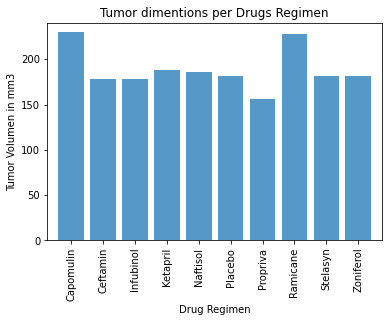

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

#new data frame is in ordered with the arrange columns as needed.
bar_pd=drop_duplicate_all.copy().groupby("Drug Regimen").count()["Tumor Volume (mm3)"]
bar_pd_df=pd.DataFrame(bar_pd)
bar_pd_df

bar_rs=bar_pd_df.reset_index()
bar_rs

x_axis=np.arange(len(bar_pd_df))
plt.bar(x_axis, bar_pd_df['Tumor Volume (mm3)'], alpha=0.75, align="center")
plt.xticks(x_axis,bar_rs["Drug Regimen"], rotation="vertical")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(bar_pd_df['Tumor Volume (mm3)'])+10)
plt.title("Tumor dimentions per Drugs Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volumen in mm3")
plt.savefig('Charts/barPlotPandas')

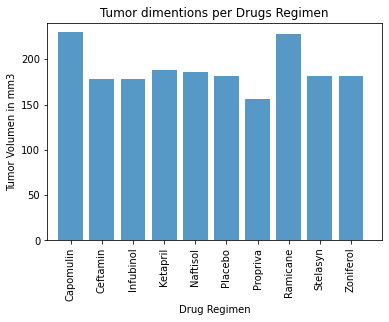

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

x_axis=np.arange(len(bar_pd_df))#using the same data frame from the pandas metho

tick_location=[x for x in x_axis]

barr3=bar_pd_df.reset_index()
barr3
#plt.figure(figsize=(30,5)) 
plt.bar(x_axis, bar_pd_df["Tumor Volume (mm3)"], alpha=0.75, align="center")
plt.xticks(tick_location, barr3["Drug Regimen"], rotation="vertical")
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(bar_pd_df["Tumor Volume (mm3)"])+10)
plt.title("Tumor dimentions per Drugs Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volumen in mm3")
plt.savefig('Charts/barPlotPyplot')
plt.show()

In [11]:
pie_pd=drop_duplicate_all.copy().groupby("Sex").nunique()["Mouse ID"]
pie_pd_df=pd.DataFrame(pie_pd)
pie_pd_df


,Mouse ID
Sex,
Female,124
Male,125


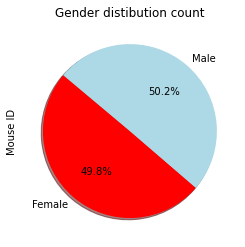

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors=["red","lightblue"]
pie_pd_df["Mouse ID"].plot(y=' ', kind= 'pie', shadow=True, startangle=140, autopct="%1.1f%%", colors=colors)
plt.title('Gender distribution count')
plt.savefig('Charts/pieChartPandas')

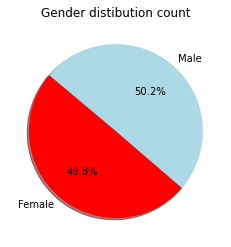

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#the new data frame needed for the pie charts reflecting only the unique number of individual mice that participated.
sizes=pie_pd_df["Mouse ID"]
labels=pie_pd_df.index.values.tolist()
colors=["red","lightblue"]
plt.pie(sizes, labels=labels,autopct="%1.1f%%",colors=colors,shadow=True, startangle=140)
plt.title('Gender distribution count')
plt.savefig('Charts/pieChartPylot')

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatLastPoint=drop_duplicate_all.copy()
greatLastPoint.drop_duplicates(subset=(["Mouse ID"]), keep='last', inplace=True)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_regimen_df=greatLastPoint[greatLastPoint["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
merge_regimen_df.sort_values("Drug Regimen", ascending= True)

#individual data frame per drug regimen.
Capomulin_uni=greatLastPoint.loc[greatLastPoint['Drug Regimen']=="Capomulin",:]
Ramicane_uni=greatLastPoint.loc[greatLastPoint['Drug Regimen']=="Ramicane",:]
Infubinol_uni=greatLastPoint.loc[greatLastPoint['Drug Regimen']=="Infubinol",:]
Ceftamin_uni=greatLastPoint.loc[greatLastPoint['Drug Regimen']=="Ceftamin",:]


In [15]:
treatment_list=[merge_regimen_df]
treatment_list

[     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
 9        k403     Ramicane    Male          21          16         45   
 19       s185    Capomulin  Female           3          17         45   
 29       x401    Capomulin  Female          16          15         45   
 39       m601    Capomulin    Male          22          17         45   
 49       g791     Ramicane    Male          11          16         45   
 ...       ...          ...     ...         ...         ...        ...   
 1797     x822     Ceftamin    Male           3          29         45   
 1813     y163    Infubinol  Female          17          27         45   
 1845     y769     Ceftamin  Female           6          27         45   
 1855     y865     Ceftamin    Male          23          26         45   
 1872     z581    Infubinol  Female          24          25         45   
 
       Tumor Volume (mm3)  Metastatic Sites  
 9              22.050126                 1  
 19             23

In [16]:
# Put treatments into a list for for loop (and later for plot labels)
#treatment_list=[Capomulin_uni,Ramicane_uni, Infubinol_uni, Ceftamin_uni]
treatment_list=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_list_volumn=merge_regimen_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_volumn_df=pd.DataFrame(tumor_list_volumn)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = merge_regimen_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Voluem is: {lowerq}")
print(f"The upper quartile of Tumor Voluem is: {upperq}")
print(f"The interquartile range of Tumor Voluem is: {iqr}")
print(f"The the median of Tumor Voluem is: {quartiles[0.5]} ")
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Tumor Voluem is: 37.187743802499995
The upper quartile of Tumor Voluem is: 59.930261755000004
The interquartile range of Tumor Voluem is: 22.74251795250001
The the median of Tumor Voluem is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


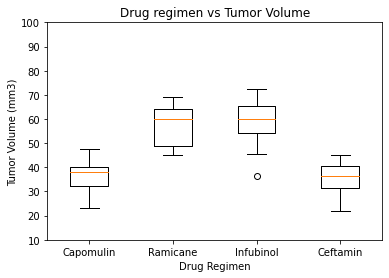

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_vol_plt=[volumn for volumn in tumor_list_volumn_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vol_plt, labels=treatment_list)
plt.ylim(10,100)
plt.title("Drug regimen vs Tumor Volume")
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.savefig('Charts/ boxPlotChart')
plt.show()


## Line and Scatter Plots

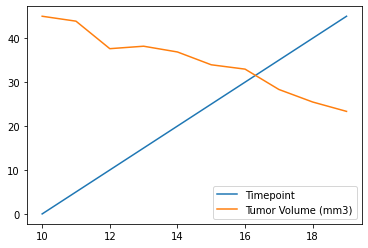

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
linePlot_Capomulin=drop_duplicate_all.copy() #using the original data cleaned up
Capomulin_uni=linePlot_Capomulin.loc[linePlot_Capomulin['Drug Regimen']=="Capomulin",:]
Capomulin_uni
mouse_unic=Capomulin_uni[Capomulin_uni['Mouse ID'].isin(['s185'])] #selectin only one mouse
mouse_unic_df=mouse_unic[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
mouse_unic_df

#final plot 
plot_line=mouse_unic_df.plot.line()
plt.savefig('Charts/ linePlot')

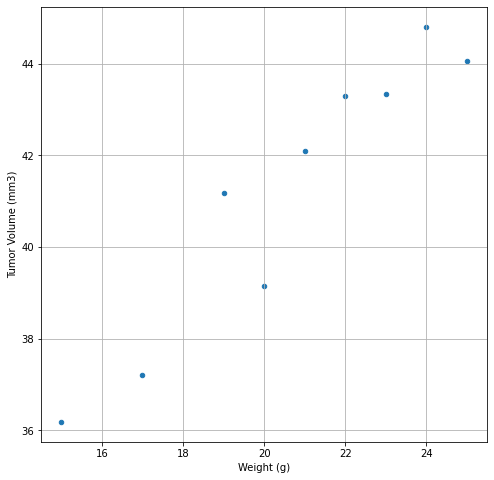

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_uni
weith_volumn_df=Capomulin_uni[["Drug Regimen","Weight (g)", "Tumor Volume (mm3)"]]
average_value= [weith_volumn_df]
ae_list= weith_volumn_df.groupby('Weight (g)')["Tumor Volume (mm3)"].mean()

plot_list=pd.DataFrame(ae_list).reset_index()

Capomulin_plt=plot_list.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (8,8))
Capomulin_plt
plt.savefig('Charts/ sctterPlot')

## Correlation and Regression

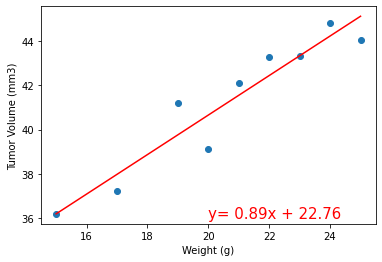

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
plot_list

# Perform a linear regression on temperature vs. latitude
x_values = plot_list['Weight (g)']
y_values = plot_list['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Get regression values
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.savefig('Charts/ regressionPlot')
plt.show()